In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction\\data\\Coup data 2.1.2.csv')
print(df.head())
print(df.shape)
print(df.info())
display(df.describe())

       coup_id  cowcode      country  year  month  day  event_type  \
0  70003101963      700  Afghanistan  1963      3   10        coup   
1  70007171973      700  Afghanistan  1973      7   17        coup   
2  70009201973      700  Afghanistan  1973      9   20   attempted   
3  70011261976      700  Afghanistan  1976     11   26  conspiracy   
4  70004271978      700  Afghanistan  1978      4   27        coup   

   unrealized  realized  conspiracy  ...  counter  other  noharm  injured  \
0           0         1           0  ...        0      0       1        0   
1           0         1           0  ...        0      0       1        0   
2           1         0           0  ...        0      0       1        0   
3           1         0           1  ...        0      0       1        0   
4           0         1           0  ...        0      0       0        0   

   killed  harrest  jailed  tried  fled  exile  
0       0        0       0      0     0      0  
1       0        0

,cowcode,year,month,day,unrealized,realized,conspiracy,attempt,military,dissident,...,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,439.515800,1979.112130,6.574924,15.873598,0.550459,0.449541,0.194699,0.355759,0.602446,0.298675,...,0.020387,0.016310,0.949032,0.008155,0.042813,0.041794,0.055046,0.010194,0.078491,0.048930
std,244.434234,19.291419,3.536074,8.804239,0.497701,0.497701,0.396171,0.478987,0.489642,0.457910,...,0.141393,0.126729,0.220045,0.089982,0.202540,0.200220,0.228186,0.100499,0.269080,0.215831
min,2.000000,1945.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,1964.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,461.000000,1978.000000,7.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,630.000000,1992.000000,10.000000,23.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,2022.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


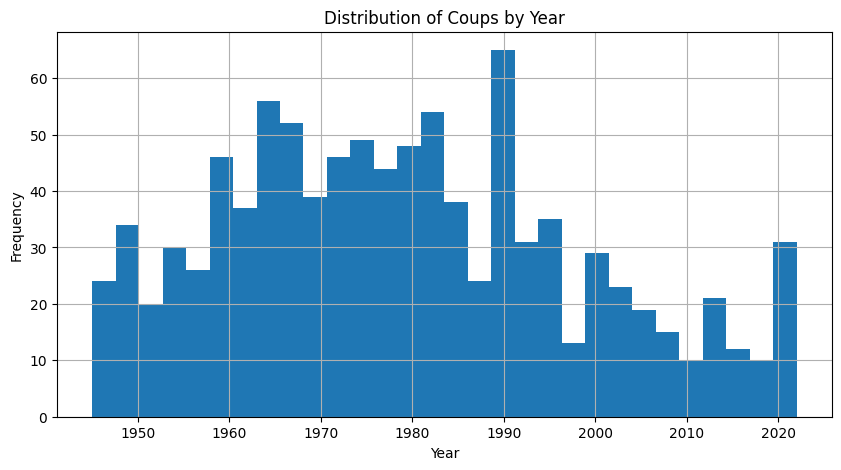

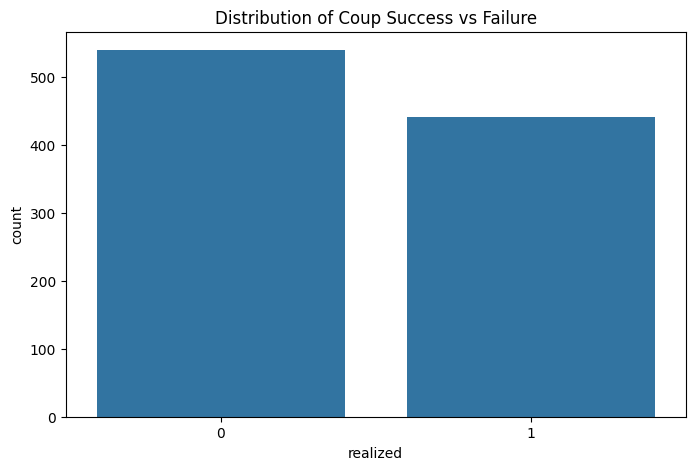

In [6]:
plt.figure(figsize=(10, 5))
df['year'].hist(bins=30)
plt.title('Distribution of Coups by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='realized', data=df)
plt.title('Distribution of Coup Success vs Failure')
plt.show()

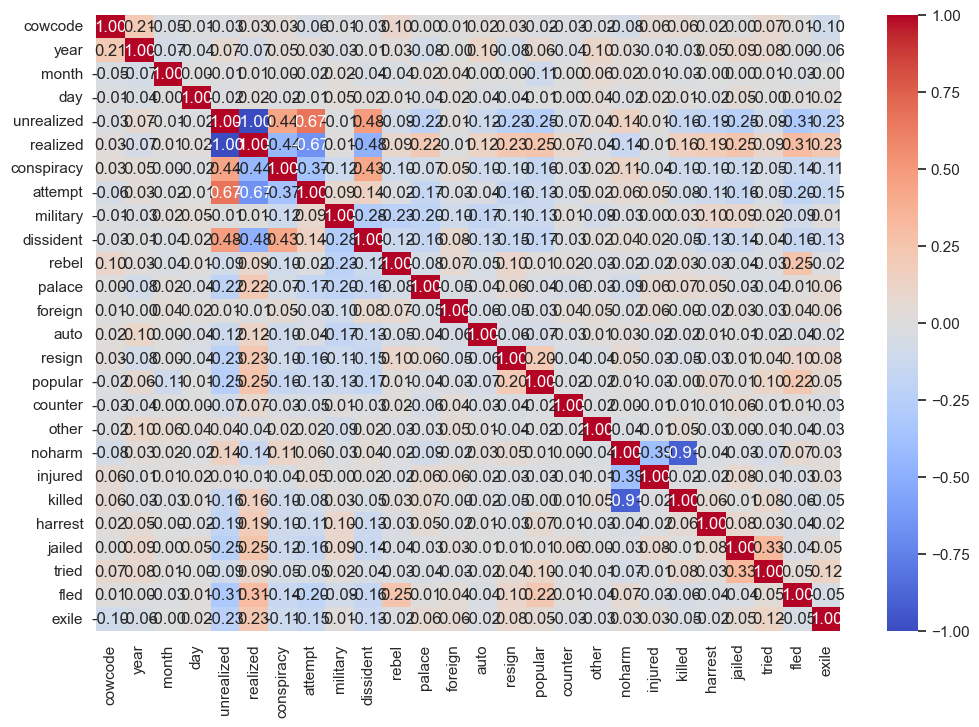

C:\Users\suhani.timbadia\AppData\Local\Temp\ipykernel_8580\4147322578.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='realized', data=df, palette="Set3")


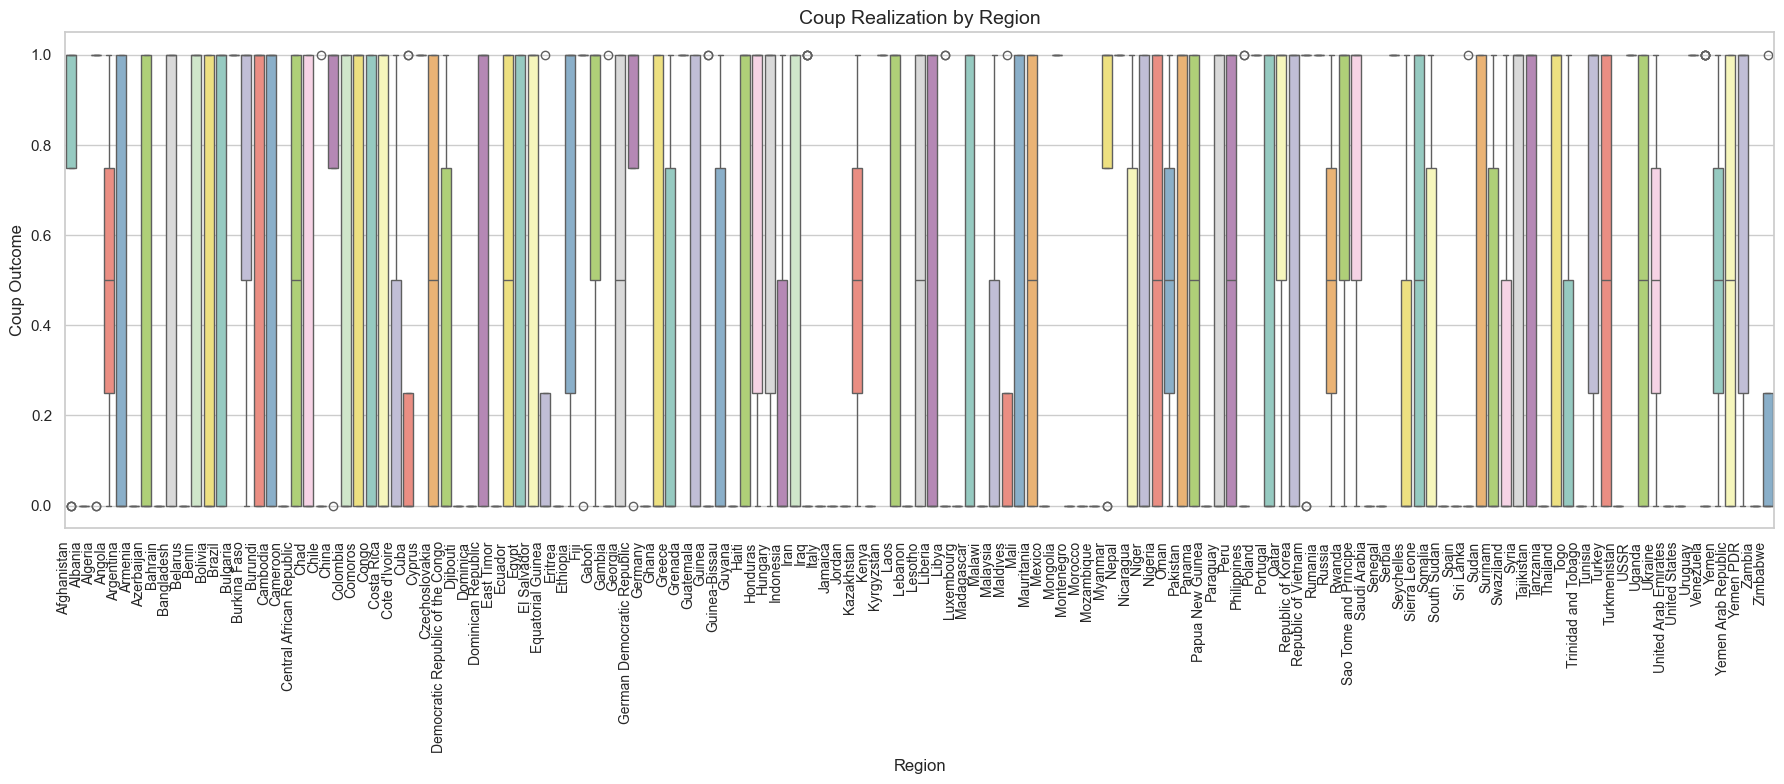

Mean Coup Realization Rate by Region:
 country
Uruguay                 1.0
Mongolia                1.0
Nepal                   1.0
Rumania                 1.0
Poland                  1.0
                       ... 
Trinidad and Tobago     0.0
United Arab Emirates    0.0
Turkmenistan            0.0
United States           0.0
Zambia                  0.0
Name: realized, Length: 137, dtype: float64


In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 8))
sns.boxplot(x='country', y='realized', data=df, palette="Set3")
plt.title('Coup Realization by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Coup Outcome', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

regional_stats = df.groupby('country')['realized'].mean().sort_values(ascending=False)
print("Mean Coup Realization Rate by Region:\n", regional_stats)

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Make a copy to avoid mutating original data
data = df.copy()

# Create a decade feature for smoother temporal patterns
data['decade'] = (data['year'] // 10) * 10

# Combine month and day into day_of_year + cyclic encoding
date = pd.to_datetime(dict(year=data['year'], month=data['month'], day=data['day']))
data['day_of_year'] = date.dt.dayofyear
data['sin_doy'] = np.sin(2 * np.pi * data['day_of_year'] / 365.0)
data['cos_doy'] = np.cos(2 * np.pi * data['day_of_year'] / 365.0)

# Define target variable
y = data['realized']

# Columns that should not be used as features (IDs, target, outcome-only or redundant raw date parts)
leak_cols = [
    'coup_id',       # identifier
    'realized',      # target
    'unrealized',    # complements target
    'noharm','injured','killed',
    'harrest','jailed','tried','fled','exile',
    # drop raw month/day because we now use day_of_year + cyclic encoding
    'month','day'
 ]
leak_cols = [c for c in leak_cols if c in data.columns]

# Feature matrix without leakage columns
X = data.drop(columns=leak_cols)

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int16','int32','int64','float16','float32','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print('Numeric columns:', num_cols)
print('Categorical columns:', cat_cols)

# Preprocessing for numeric features: median imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: mode imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # sklearn >= 1.4 uses sparse_output instead of sparse
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Train/test split before fitting transformers to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit on train only, then transform train and test
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Build feature names for processed matrices
ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
feature_names = num_cols + list(ohe_feature_names)

X_train_df = pd.DataFrame(X_train_proc, columns=feature_names)
X_test_df = pd.DataFrame(X_test_proc, columns=feature_names)

print('X_train shape:', X_train_df.shape)
print('X_test shape:', X_test_df.shape)
print('First rows of X_train:')
print(X_train_df.head())

Numeric columns: ['cowcode', 'year', 'conspiracy', 'attempt', 'military', 'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular', 'counter', 'other', 'decade', 'day_of_year', 'sin_doy', 'cos_doy']
Categorical columns: ['country', 'event_type']
X_train shape: (784, 155)
X_test shape: (197, 155)
First rows of X_train:
    cowcode      year  conspiracy   attempt  military  dissident     rebel  \
0 -1.583259 -0.714785   -0.486408  1.334220 -1.226700  -0.646314 -0.249661   
1  0.030734 -0.457063   -0.486408  1.334220 -1.226700   1.547236 -0.249661   
2  1.383880 -1.075596   -0.486408 -0.749502 -1.226700  -0.646314 -0.249661   
3 -1.346866 -1.333319   -0.486408 -0.749502  0.815195  -0.646314 -0.249661   
4  0.874413  0.883094    2.055886 -0.749502  0.815195   1.547236 -0.249661   

     palace   foreign      auto  ...  country_Uruguay  country_Venezuela  \
0 -0.380165 -0.315562 -0.212916  ...              0.0                0.0   
1 -0.380165  3.168951 -0.212916  ...         